In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Conectar a la base de datos
conn = sqlite3.connect('steam_data.db')

# Leer los datos de la tabla steam_games en un DataFrame
df = pd.read_sql_query("SELECT * FROM steam_games", conn)

# Cerrar la conexión
conn.close()

# Mostrar las primeras filas del DataFrame
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,730,Counter-Strike: Global Offensive,Valve,Valve,,7642084,1173003,0,"100,000,000 .. 200,000,000",33076,731,6137,295,0,0,0,1013936
1,1172470,Apex Legends,Respawn,Electronic Arts,,668053,326926,0,"100,000,000 .. 200,000,000",10632,622,962,250,0,0,0,124262
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1520457,1037487,0,"100,000,000 .. 200,000,000",23472,855,6057,316,0,0,0,314682
3,1623730,Palworld,Pocketpair,Pocketpair,,358266,22443,0,"50,000,000 .. 100,000,000",3799,689,2202,219,2999,2999,0,18028
4,440,Team Fortress 2,Valve,Valve,,1044264,117208,0,"50,000,000 .. 100,000,000",23714,330,4326,89,0,0,0,43819


In [3]:
# Ver información sobre la columna price
print(df['price'].dtype)
print(df['price'].isnull().sum())
print(df['price'].head(10))

object
0
0       0
1       0
2       0
3    2999
4       0
5    3849
6    5999
7    5999
8       0
9     999
Name: price, dtype: object


In [4]:
#Convertir la columna price a tipo numérico, manejando errores
df['price'] = pd.to_numeric(df['price'], errors='coerce')
print(df['price'].dtype)
# Dividimos los datos de la columna price / 100
df['price'] = df['price'] / 100

float64


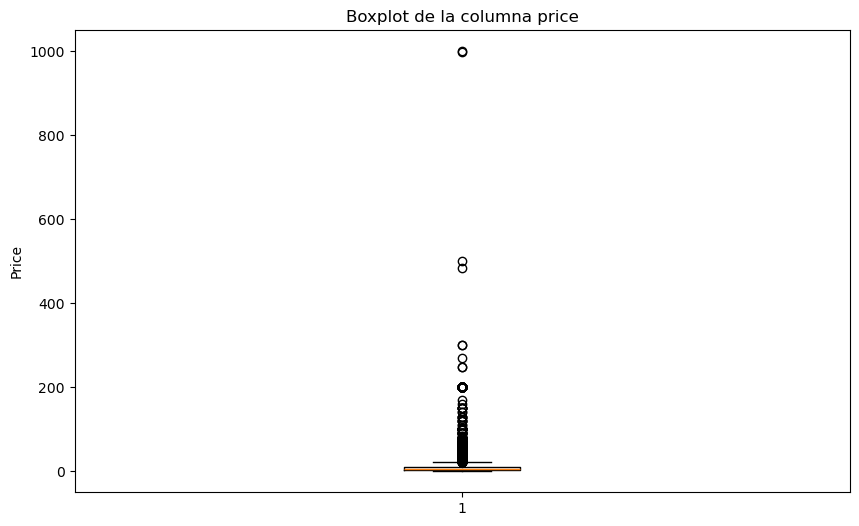

In [5]:
# Mostrar boxplot de la columna price
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna())
plt.title('Boxplot de la columna price')
plt.ylabel('Price')
plt.show()